# Final Project

- [Proposal](https://docs.google.com/document/d/1unp9emEueY_tyzT37XDVOiNJ4MBI39SgqNB95Cb8c3c/edit?usp=sharing)
- [Proposal Slides](https://docs.google.com/presentation/d/19HS_KwSPFKRd2zuvY_Q2bnih39fn7u_j0c6uu4J9InA/edit?usp=sharing)
- [Report]()
- [Final Presentation Slides]()
- [Dataset](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=results.csv)
- [API](https://docs.fastf1.dev/core.html#api-reference)

## Setup

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import fastf1
from scipy.stats import pearsonr
import numpy as np

## Exploring/Cleaning Data

In [5]:
# session = fastf1.get_session(2022, 'Australia', 'race')
# session.load()
# display(session.name)
# display(session.date)
# display(session.session_info)
# display(session.drivers)
# display(session.results)
# display(session.laps)
# display(session.total_laps)
# display(session.weather_data)
# display(session.car_data)
# display(session.pos_data)
# display(session.session_start_time)
# display(session.t0_date)

In [2]:
session = fastf1.get_session(2023, 'Monza', 'race')
session.load()
laps = session.laps

req         WARNING 	DEFAULT CACHE ENABLED! (347.75 MB) C:\Users\nated\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Italian Grand Prix - Race [v3.3.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', 

In [3]:
laps['LapSeconds'] = (laps['LapTime'].dt.seconds * 1000000 + laps['LapTime'].dt.microseconds) / 1000000
display(laps)
display(laps.columns)
laps.describe()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapSeconds
0,0 days 01:23:49.801000,VER,1,0 days 00:01:27.905000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.666000,...,Red Bull Racing,0 days 01:22:21.726000,2023-09-03 13:23:22.771,1,3.0,False,,False,False,87.905
1,0 days 01:25:15.964000,VER,1,0 days 00:01:26.163000,2.0,1.0,NaT,NaT,0 days 00:00:28.274000,0 days 00:00:29.543000,...,Red Bull Racing,0 days 01:23:49.801000,2023-09-03 13:24:50.846,1,2.0,False,,False,True,86.163
2,0 days 01:26:41.666000,VER,1,0 days 00:01:25.702000,3.0,1.0,NaT,NaT,0 days 00:00:28.097000,0 days 00:00:29.320000,...,Red Bull Racing,0 days 01:25:15.964000,2023-09-03 13:26:17.009,1,2.0,False,,False,True,85.702
3,0 days 01:28:07.716000,VER,1,0 days 00:01:26.050000,4.0,1.0,NaT,NaT,0 days 00:00:28.145000,0 days 00:00:29.474000,...,Red Bull Racing,0 days 01:26:41.666000,2023-09-03 13:27:42.711,1,2.0,False,,False,True,86.050
4,0 days 01:29:33.892000,VER,1,0 days 00:01:26.176000,5.0,1.0,NaT,NaT,0 days 00:00:28.155000,0 days 00:00:29.514000,...,Red Bull Racing,0 days 01:28:07.716000,2023-09-03 13:29:08.761,1,2.0,False,,False,True,86.176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0 days 02:31:27.453000,PIA,81,0 days 00:01:26.614000,47.0,3.0,NaT,NaT,0 days 00:00:28.276000,0 days 00:00:29.795000,...,McLaren,0 days 02:30:00.839000,2023-09-03 14:31:01.884,1,13.0,False,,False,True,86.614
963,0 days 02:32:53.520000,PIA,81,0 days 00:01:26.067000,48.0,3.0,NaT,NaT,0 days 00:00:28.089000,0 days 00:00:29.668000,...,McLaren,0 days 02:31:27.453000,2023-09-03 14:32:28.498,1,13.0,False,,False,True,86.067
964,0 days 02:34:19.361000,PIA,81,0 days 00:01:25.841000,49.0,3.0,NaT,NaT,0 days 00:00:27.763000,0 days 00:00:29.762000,...,McLaren,0 days 02:32:53.520000,2023-09-03 14:33:54.565,1,12.0,False,,False,True,85.841
965,0 days 02:35:44.954000,PIA,81,0 days 00:01:25.593000,50.0,3.0,NaT,NaT,0 days 00:00:28.181000,0 days 00:00:29.335000,...,McLaren,0 days 02:34:19.361000,2023-09-03 14:35:20.406,1,11.0,False,,False,True,85.593


Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'LapSeconds'],
      dtype='object')

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,LapStartTime,LapStartDate,Position,LapSeconds
count,967,948,967.000000,967.000000,25,26,929,948,948,928,...,948,795.000000,948.000000,919.000000,843.000000,967.000000,967,949,949.000000,948.000000
mean,0 days 02:00:29.264126163,0 days 00:01:27.766147679,25.974147,1.736298,0 days 01:55:36.463640,0 days 01:56:09.235000,0 days 00:00:28.839644779,0 days 00:00:30.047214135,0 days 00:00:28.819651898,0 days 01:59:34.552404094,...,0 days 01:59:47.180035864,312.916981,315.113924,308.202394,318.660735,14.389866,0 days 01:58:59.472268872,2023-09-03 13:59:18.187492096,9.858799,87.766148
min,0 days 01:23:49.013000,0 days 00:01:25.072000,1.000000,1.000000,0 days 01:37:34.372000,0 days 01:37:06.997000,0 days 00:00:27.731000,0 days 00:00:29.130000,0 days 00:00:27.838000,0 days 01:24:17.279000,...,0 days 01:23:49.115000,174.000000,220.000000,238.000000,246.000000,1.000000,0 days 01:22:21.726000,2023-09-03 13:23:22.771000,1.000000,85.072000
25%,0 days 01:41:29.115500,0 days 00:01:26.463250,13.000000,1.000000,0 days 01:44:37.492000,0 days 01:45:37.737750,0 days 00:00:28.148000,0 days 00:00:29.761500,0 days 00:00:28.421000,0 days 01:41:43.683000,...,0 days 01:41:21.677250,310.000000,310.000000,307.000000,313.000000,8.000000,0 days 01:40:00.253500,2023-09-03 13:40:52.444000,5.000000,86.463250
50%,0 days 02:00:35.264000,0 days 00:01:27.044000,26.000000,2.000000,0 days 01:53:09.955000,0 days 01:52:54.541500,0 days 00:00:28.261000,0 days 00:00:30.005500,0 days 00:00:28.677500,0 days 01:59:40.655500,...,0 days 01:59:35.047500,313.000000,313.000000,308.000000,319.000000,13.000000,0 days 01:59:08.862000,2023-09-03 13:59:04.567000064,10.000000,87.044000
75%,0 days 02:18:53.835000,0 days 00:01:27.518750,39.000000,2.000000,0 days 02:02:09.621000,0 days 02:06:32.563500,0 days 00:00:28.412000,0 days 00:00:30.226500,0 days 00:00:28.925250,0 days 02:17:22.906250,...,0 days 02:17:56.421500,316.000000,321.000000,310.000000,326.000000,20.000000,0 days 02:17:28.112000,2023-09-03 14:17:29.972999936,15.000000,87.518750
max,0 days 02:40:15.309000,0 days 00:01:53.593000,52.000000,3.000000,0 days 02:22:52.576000,0 days 02:22:20.779000,0 days 00:00:56.224000,0 days 00:00:32.732000,0 days 00:00:47.837000,0 days 02:35:49.737000,...,0 days 02:36:49.320000,333.000000,342.000000,322.000000,359.000000,40.000000,0 days 02:36:49.333000,2023-09-03 14:36:22.983000,20.000000,113.593000
std,0 days 00:21:43.269455167,0 days 00:00:03.598416700,14.812575,0.626994,0 days 00:12:43.457600916,0 days 00:13:23.479666184,0 days 00:00:03.371164983,0 days 00:00:00.452883617,0 days 00:00:01.050402745,0 days 00:20:47.343383159,...,0 days 00:21:13.476124677,7.202060,8.309718,3.358784,13.787623,8.410288,0 days 00:21:40.153970404,NaN,5.432272,3.598417


<Axes: xlabel='LapNumber', ylabel='LapSeconds'>

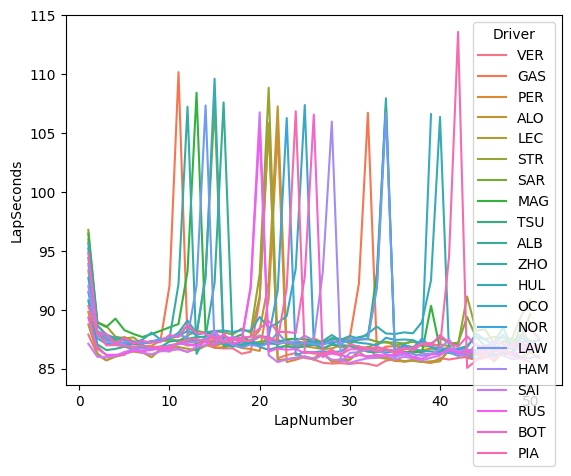

In [4]:
sns.lineplot(laps, x='LapNumber', y='LapSeconds', hue='Driver')
# plt.gca().invert_yaxis()  # Invert the y-axis

-0.1295418407743323

6.330333534052088e-05

88.5858327647064

-0.03212457980659015

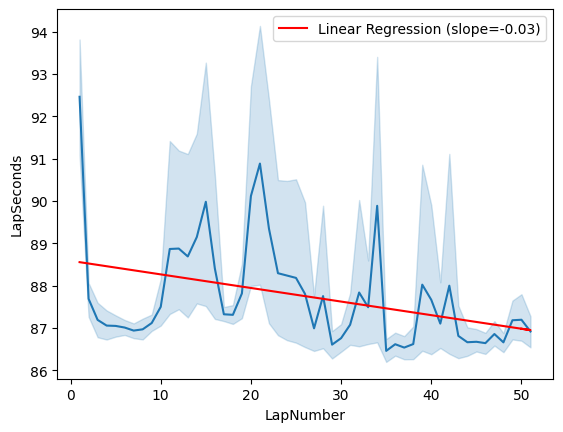

In [6]:
cleanLaps = laps.dropna(subset='LapSeconds')
corr, p_value = pearsonr(cleanLaps['LapNumber'], cleanLaps['LapSeconds'])
display(corr)
display(p_value)
slope, intercept = np.polyfit(cleanLaps['LapNumber'], cleanLaps['LapSeconds'], 1)
display(intercept)
display(slope)
sns.lineplot(laps, x='LapNumber', y='LapSeconds')
plt.plot(cleanLaps['LapNumber'], slope * cleanLaps['LapNumber'] + intercept, color='red', label=f'Linear Regression (slope={slope:.2f})')
plt.legend()
# plt.gca().invert_yaxis()  # Invert the y-axis

In [14]:
verstappen = laps[laps.Driver == 'VER']
verstappen
# sns.lineplot(verstappen, x='LapNumber', y='LapStartTime')
# plt.gca().invert_yaxis()  # Invert the y-axis

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapSeconds
0,0 days 01:23:49.801000,VER,1,0 days 00:01:27.905000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.666000,...,Red Bull Racing,0 days 01:22:21.726000,2023-09-03 13:23:22.771,1,3.0,False,,False,False,87.905
1,0 days 01:25:15.964000,VER,1,0 days 00:01:26.163000,2.0,1.0,NaT,NaT,0 days 00:00:28.274000,0 days 00:00:29.543000,...,Red Bull Racing,0 days 01:23:49.801000,2023-09-03 13:24:50.846,1,2.0,False,,False,True,86.163
2,0 days 01:26:41.666000,VER,1,0 days 00:01:25.702000,3.0,1.0,NaT,NaT,0 days 00:00:28.097000,0 days 00:00:29.320000,...,Red Bull Racing,0 days 01:25:15.964000,2023-09-03 13:26:17.009,1,2.0,False,,False,True,85.702
3,0 days 01:28:07.716000,VER,1,0 days 00:01:26.050000,4.0,1.0,NaT,NaT,0 days 00:00:28.145000,0 days 00:00:29.474000,...,Red Bull Racing,0 days 01:26:41.666000,2023-09-03 13:27:42.711,1,2.0,False,,False,True,86.050
4,0 days 01:29:33.892000,VER,1,0 days 00:01:26.176000,5.0,1.0,NaT,NaT,0 days 00:00:28.155000,0 days 00:00:29.514000,...,Red Bull Racing,0 days 01:28:07.716000,2023-09-03 13:29:08.761,1,2.0,False,,False,True,86.176
5,0 days 01:31:00.729000,VER,1,0 days 00:01:26.837000,6.0,1.0,NaT,NaT,0 days 00:00:28.700000,0 days 00:00:29.662000,...,Red Bull Racing,0 days 01:29:33.892000,2023-09-03 13:30:34.937,1,2.0,False,,False,True,86.837
6,0 days 01:32:27.097000,VER,1,0 days 00:01:26.368000,7.0,1.0,NaT,NaT,0 days 00:00:28.166000,0 days 00:00:29.751000,...,Red Bull Racing,0 days 01:31:00.729000,2023-09-03 13:32:01.774,1,2.0,False,,False,True,86.368
7,0 days 01:33:53.087000,VER,1,0 days 00:01:25.990000,8.0,1.0,NaT,NaT,0 days 00:00:28.075000,0 days 00:00:29.432000,...,Red Bull Racing,0 days 01:32:27.097000,2023-09-03 13:33:28.142,1,2.0,False,,False,True,85.990
8,0 days 01:35:19.692000,VER,1,0 days 00:01:26.605000,9.0,1.0,NaT,NaT,0 days 00:00:28.149000,0 days 00:00:29.927000,...,Red Bull Racing,0 days 01:33:53.087000,2023-09-03 13:34:54.132,1,2.0,False,,False,True,86.605
9,0 days 01:36:46.295000,VER,1,0 days 00:01:26.603000,10.0,1.0,NaT,NaT,0 days 00:00:28.315000,0 days 00:00:29.780000,...,Red Bull Racing,0 days 01:35:19.692000,2023-09-03 13:36:20.737,1,2.0,False,,False,True,86.603


In [11]:
# laps[not laps.PitOutTime.isna() or not laps.PitOutTime.isna()]
laps.loc[(laps['PitInTime'].notnull()) | (laps['PitOutTime'].notnull())]

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
19,0 days 01:51:16.867000,VER,1,0 days 00:01:30.849000,20.0,1.0,NaT,0 days 01:51:13.003000,0 days 00:00:28.384000,0 days 00:00:29.907000,...,True,Red Bull Racing,0 days 01:49:46.018000,2023-09-03 13:50:47.063,1,1.0,False,,False,False
20,0 days 01:53:02.527000,VER,1,0 days 00:01:45.660000,21.0,2.0,0 days 01:51:37.284000,NaT,0 days 00:00:48.054000,0 days 00:00:29.398000,...,True,Red Bull Racing,0 days 01:51:16.867000,2023-09-03 13:52:17.912,1,5.0,False,,False,False
61,0 days 01:37:10.822000,GAS,10,0 days 00:01:32.034000,10.0,1.0,NaT,0 days 01:37:06.997000,0 days 00:00:28.126000,0 days 00:00:30.178000,...,True,Alpine,0 days 01:35:38.788000,2023-09-03 13:36:39.833,1,18.0,False,,False,False
62,0 days 01:39:00.992000,GAS,10,0 days 00:01:50.170000,11.0,2.0,0 days 01:37:34.372000,NaT,0 days 00:00:51.420000,0 days 00:00:29.937000,...,False,Alpine,0 days 01:37:10.822000,2023-09-03 13:38:11.867,1,19.0,False,,False,False
82,0 days 02:08:12.097000,GAS,10,0 days 00:01:32.204000,31.0,2.0,NaT,0 days 02:08:08.289000,0 days 00:00:28.325000,0 days 00:00:30.421000,...,False,Alpine,0 days 02:06:39.893000,2023-09-03 14:07:40.938,1,17.0,False,,False,False
83,0 days 02:09:58.817000,GAS,10,0 days 00:01:46.720000,32.0,3.0,0 days 02:08:32.961000,NaT,0 days 00:00:48.486000,0 days 00:00:29.732000,...,True,Alpine,0 days 02:08:12.097000,2023-09-03 14:09:13.142,1,19.0,False,,False,False
123,0 days 01:52:49.970000,PER,11,0 days 00:01:30.934000,21.0,1.0,NaT,0 days 01:52:46.112000,0 days 00:00:28.368000,0 days 00:00:30.014000,...,True,Red Bull Racing,0 days 01:51:19.036000,2023-09-03 13:52:20.081,1,1.0,False,,False,False
124,0 days 01:54:35.198000,PER,11,0 days 00:01:45.228000,22.0,2.0,0 days 01:53:09.955000,NaT,0 days 00:00:47.765000,0 days 00:00:29.377000,...,True,Red Bull Racing,0 days 01:52:49.970000,2023-09-03 13:53:51.015,1,7.0,False,,False,False
175,0 days 01:53:06.796000,ALO,14,0 days 00:01:32.377000,21.0,1.0,NaT,0 days 01:53:02.971000,0 days 00:00:28.267000,0 days 00:00:30.526000,...,True,Aston Martin,0 days 01:51:34.419000,2023-09-03 13:52:35.464,1,6.0,False,,False,False
176,0 days 01:54:54.068000,ALO,14,0 days 00:01:47.272000,22.0,2.0,0 days 01:53:27.799000,NaT,0 days 00:00:48.485000,0 days 00:00:30.233000,...,False,Aston Martin,0 days 01:53:06.796000,2023-09-03 13:54:07.841,1,12.0,False,,False,False


In [21]:
drivers = laps.groupby('Driver').agg({'PitInTime': 'count', 'PitOutTime': 'count', 'LapTime': 'mean'}).reset_index()
drivers = drivers[drivers.PitInTime == drivers.PitOutTime]
drivers = drivers.dropna(subset='LapTime')
drivers.sort_values(by='LapTime')

,Driver,PitInTime,PitOutTime,LapTime
18,VER,1,1,0 days 00:01:26.689078431
11,PER,1,1,0 days 00:01:26.807980392
14,SAI,1,1,0 days 00:01:26.908549019
7,LEC,1,1,0 days 00:01:26.912156862
13,RUS,1,1,0 days 00:01:27.042568627
4,HAM,1,1,0 days 00:01:27.427882352
0,ALB,1,1,0 days 00:01:27.573509803
9,NOR,1,1,0 days 00:01:27.580235294
1,ALO,1,1,0 days 00:01:27.596803921
2,BOT,1,1,0 days 00:01:27.962500


## Circuits

In [6]:
circuits = pd.read_csv('circuits.csv')
circuits[circuits.circuitId == 14]

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
13,14,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162,http://en.wikipedia.org/wiki/Autodromo_Naziona...


## Races

In [4]:
races = pd.read_csv('races.csv')
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


<Axes: xlabel='circuitId', ylabel='year'>

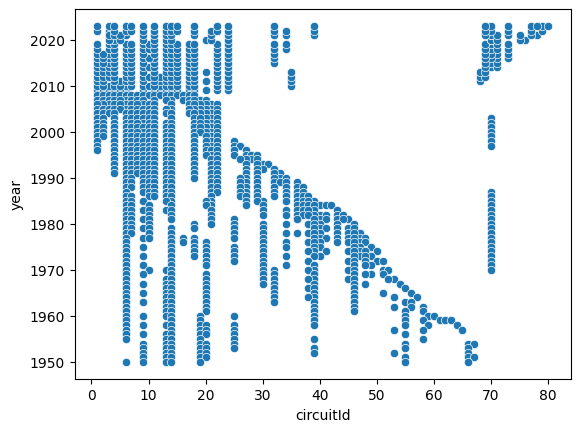

In [8]:
sns.scatterplot(x='circuitId', y='year', data=races)

In [9]:
raceTotals = races.groupby('circuitId').agg({'raceId': 'count', 'year': 'max'}).reset_index()
raceTotals = raceTotals[raceTotals.year == 2023].reset_index(drop=True).sort_values('raceId', ascending=False)
raceTotals

,circuitId,raceId,year
8,14,73,2023
3,6,69,2023
5,9,58,2023
7,13,56,2023
4,7,42,2023
10,18,40,2023
6,11,38,2023
16,70,37,2023
11,22,33,2023
14,39,33,2023


<Axes: xlabel='circuitId', ylabel='year'>

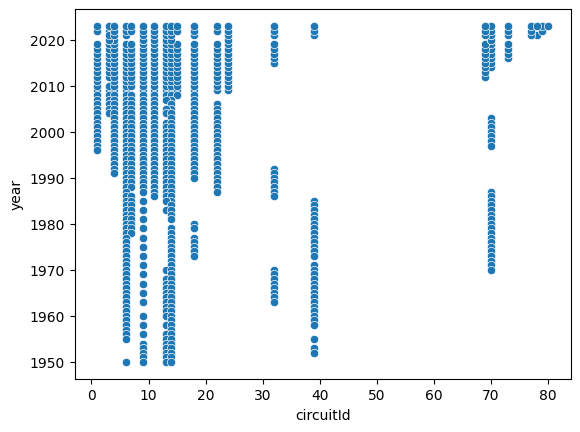

In [10]:
recentRaces = races[races.circuitId.isin(raceTotals.circuitId)].reset_index(drop=True)
sns.scatterplot(x='circuitId', y='year', data=recentRaces)

In [11]:
circuitsToKeep = recentRaces[recentRaces.year == 2009]
recentRaces = races[races.circuitId.isin(circuitsToKeep.circuitId)].reset_index(drop=True)
commonNames = recentRaces.groupby('circuitId')['name'].agg(lambda x: x.mode().iloc[0]).reset_index()
commonNames.columns = ['circuitId', 'common_name']
recentRaces = pd.merge(recentRaces, commonNames, on='circuitId', how='left')
display(recentRaces)
display(recentRaces.common_name.unique())
display(raceTotals[raceTotals.circuitId.isin(recentRaces.circuitId)])

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,common_name
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Australian Grand Prix
1,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Bahrain Grand Prix
2,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Spanish Grand Prix
3,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Monaco Grand Prix
4,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,British Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,1112,2023,14,14,Italian Grand Prix,2023-09-03,13:00:00,https://en.wikipedia.org/wiki/2023_Italian_Gra...,2023-09-01,11:30:00,2023-09-01,15:00:00,2023-09-02,10:30:00,2023-09-02,14:00:00,\N,\N,Italian Grand Prix
471,1113,2023,15,15,Singapore Grand Prix,2023-09-17,12:00:00,https://en.wikipedia.org/wiki/2023_Singapore_G...,2023-09-15,09:30:00,2023-09-15,13:00:00,2023-09-16,09:30:00,2023-09-16,13:00:00,\N,\N,Singapore Grand Prix
472,1114,2023,16,22,Japanese Grand Prix,2023-09-24,05:00:00,https://en.wikipedia.org/wiki/2023_Japanese_Gr...,2023-09-22,02:30:00,2023-09-22,06:00:00,2023-09-23,02:30:00,2023-09-23,06:00:00,\N,\N,Japanese Grand Prix
473,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00,Brazilian Grand Prix


array(['Australian Grand Prix', 'Bahrain Grand Prix',
       'Spanish Grand Prix', 'Monaco Grand Prix', 'British Grand Prix',
       'Hungarian Grand Prix', 'Belgian Grand Prix', 'Italian Grand Prix',
       'Singapore Grand Prix', 'Japanese Grand Prix',
       'Brazilian Grand Prix', 'Abu Dhabi Grand Prix'], dtype=object)

,circuitId,raceId,year
8,14,73,2023
3,6,69,2023
5,9,58,2023
7,13,56,2023
10,18,40,2023
6,11,38,2023
11,22,33,2023
2,4,33,2023
0,1,26,2023
1,3,20,2023


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Australian Grand Prix'),
  Text(1, 0, 'Bahrain Grand Prix'),
  Text(2, 0, 'Spanish Grand Prix'),
  Text(3, 0, 'Monaco Grand Prix'),
  Text(4, 0, 'British Grand Prix'),
  Text(5, 0, 'Hungarian Grand Prix'),
  Text(6, 0, 'Belgian Grand Prix'),
  Text(7, 0, 'Italian Grand Prix'),
  Text(8, 0, 'Singapore Grand Prix'),
  Text(9, 0, 'Japanese Grand Prix'),
  Text(10, 0, 'Brazilian Grand Prix'),
  Text(11, 0, 'Abu Dhabi Grand Prix')])

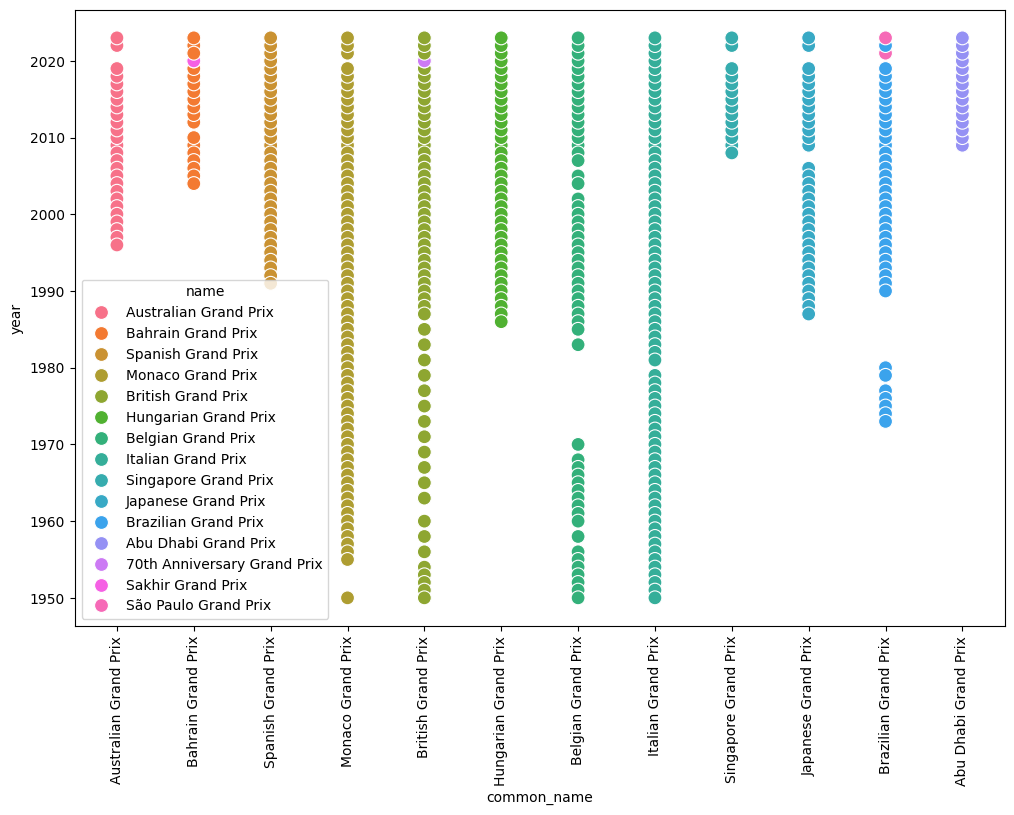

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='common_name', y='year', data=recentRaces, hue='name', s=100)
plt.xticks(rotation=90)

In [13]:
recentRaces = pd.merge(recentRaces, circuits, on='circuitId', how='left')
recentRaces = recentRaces.rename(columns={'name_x': 'race_name', 'url_x': 'race_url', 'common_name': 'common_race_name', 'name_y': 'circuit_name', 'url_y': 'circuit_url'})
recentRaces

,raceId,year,round,circuitId,race_name,date,time,race_url,fp1_date,fp1_time,...,sprint_time,common_race_name,circuitRef,circuit_name,location,country,lat,lng,alt,circuit_url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,\N,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,...,\N,Bahrain Grand Prix,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
2,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,...,\N,Spanish Grand Prix,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
3,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,\N,\N,...,\N,Monaco Grand Prix,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.7347,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
4,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...,\N,\N,...,\N,British Grand Prix,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,1112,2023,14,14,Italian Grand Prix,2023-09-03,13:00:00,https://en.wikipedia.org/wiki/2023_Italian_Gra...,2023-09-01,11:30:00,...,\N,Italian Grand Prix,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162,http://en.wikipedia.org/wiki/Autodromo_Naziona...
471,1113,2023,15,15,Singapore Grand Prix,2023-09-17,12:00:00,https://en.wikipedia.org/wiki/2023_Singapore_G...,2023-09-15,09:30:00,...,\N,Singapore Grand Prix,marina_bay,Marina Bay Street Circuit,Marina Bay,Singapore,1.2914,103.86400,18,http://en.wikipedia.org/wiki/Marina_Bay_Street...
472,1114,2023,16,22,Japanese Grand Prix,2023-09-24,05:00:00,https://en.wikipedia.org/wiki/2023_Japanese_Gr...,2023-09-22,02:30:00,...,\N,Japanese Grand Prix,suzuka,Suzuka Circuit,Suzuka,Japan,34.8431,136.54100,45,http://en.wikipedia.org/wiki/Suzuka_Circuit
473,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,...,18:30:00,Brazilian Grand Prix,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,-23.7036,-46.69970,785,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Jo...


## Constructor Results

In [14]:
constructor_results = pd.read_csv('constructor_results.csv')
constructor_results = pd.merge(constructor_results, races[['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time']], how='left')
constructor_results

,constructorResultsId,raceId,constructorId,points,status,year,round,circuitId,name,date,time
0,1,18,1,14.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
1,2,18,2,8.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
2,3,18,3,9.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
3,4,18,4,5.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
4,5,18,5,2.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
...,...,...,...,...,...,...,...,...,...,...,...
12285,16785,1110,214,10.0,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00
12286,16786,1110,213,1.0,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00
12287,16787,1110,51,0.0,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00
12288,16788,1110,3,0.0,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00


## Constructor Standings

In [15]:
constructor_standings = pd.read_csv('constructor_standings.csv')
display(constructor_standings)
constructor_standings.groupby('raceId').agg({'constructorId': 'count', 'wins': 'sum'})
# constructor_standings[constructor_standings.constructorId == 1].wins.tolist()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13046,28568,1110,214,57.0,6,6,0
13047,28569,1110,3,11.0,7,7,0
13048,28570,1110,213,3.0,10,10,0
13049,28571,1110,210,11.0,8,8,0


,constructorId,wins
raceId,,
1,9,1
2,10,2
3,10,3
4,10,4
5,10,5
...,...,...
1106,10,8
1107,10,9
1108,10,10


raceId               int64
year                 int64
round                int64
circuitId            int64
name                object
date                object
time_x              object
resultId             int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time_y              object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed      int32
statusId             int64
dtype: object

<Axes: xlabel='fastestLapSpeed', ylabel='year'>

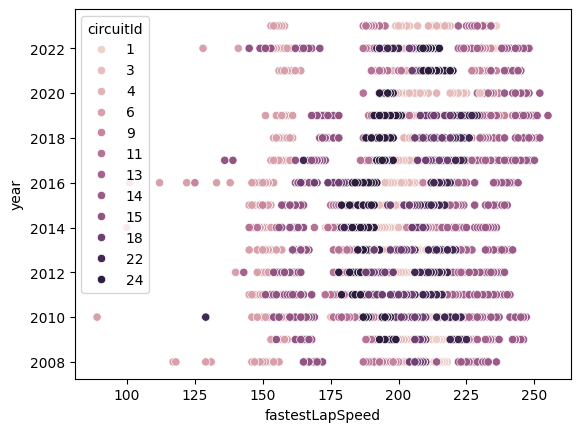

In [46]:
circuit_id = [1,3,4,6,9,11,13,14,15,18,22,24]

results = pd.read_csv('results.csv')

all_circuits = races.loc[races['circuitId'].isin(circuit_id)]
all_circuits = all_circuits[all_circuits.year >= 2008]
all_circuits.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

all_circuits =  pd.merge(all_circuits, results, on='raceId')

all_circuits = all_circuits[all_circuits.fastestLapSpeed != '\\N']
all_circuits['fastestLapSpeed'] = all_circuits['fastestLapSpeed'].astype(str).astype(float).astype(int)

display(all_circuits.dtypes)

sns.scatterplot(x='fastestLapSpeed', y='year', hue='circuitId', legend='full', data=all_circuits)



<Axes: xlabel='fastestLapSpeed', ylabel='year'>

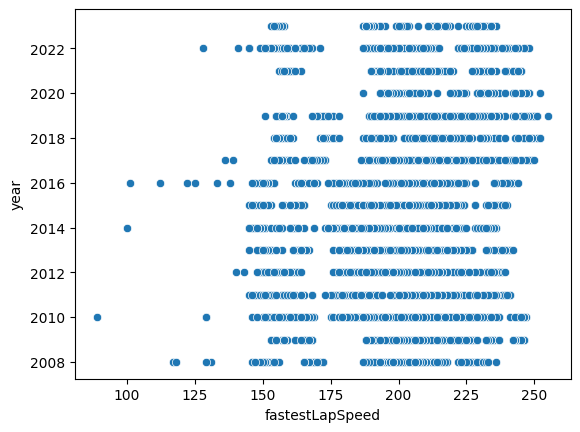

In [43]:
sns.scatterplot(x='fastestLapSpeed', y='year', data=all_circuits)

,raceId,year,round,circuitId,name,date,time_x,resultId,driverId,constructorId,...,positionOrder,points,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,13,2009,13,14,Italian Grand Prix,2009-09-13,12:00:00,7794,22,23,...,1,10.0,53,1:16:21.706,4581706,48,5,1:24.967,245,1
1,13,2009,13,14,Italian Grand Prix,2009-09-13,12:00:00,7795,18,23,...,2,8.0,53,+2.866,4584572,46,4,1:24.935,245,1
2,13,2009,13,14,Italian Grand Prix,2009-09-13,12:00:00,7796,8,6,...,3,6.0,53,+30.664,4612370,36,2,1:24.761,246,1
3,13,2009,13,14,Italian Grand Prix,2009-09-13,12:00:00,7797,16,10,...,4,5.0,53,+31.131,4612837,36,1,1:24.739,246,1
4,13,2009,13,14,Italian Grand Prix,2009-09-13,12:00:00,7798,4,4,...,5,4.0,53,+59.182,4640888,50,8,1:25.199,244,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,1089,2022,16,14,Italian Grand Prix,2022-09-11,13:00:00,25721,825,210,...,16,0.0,52,\N,\N,37,16,1:26.798,240,11
314,1089,2022,16,14,Italian Grand Prix,2022-09-11,13:00:00,25722,817,1,...,17,0.0,45,\N,\N,39,12,1:26.603,240,44
315,1089,2022,16,14,Italian Grand Prix,2022-09-11,13:00:00,25723,840,117,...,18,0.0,39,\N,\N,34,19,1:27.467,238,5
316,1089,2022,16,14,Italian Grand Prix,2022-09-11,13:00:00,25724,4,214,...,19,0.0,31,\N,\N,7,18,1:27.203,239,34


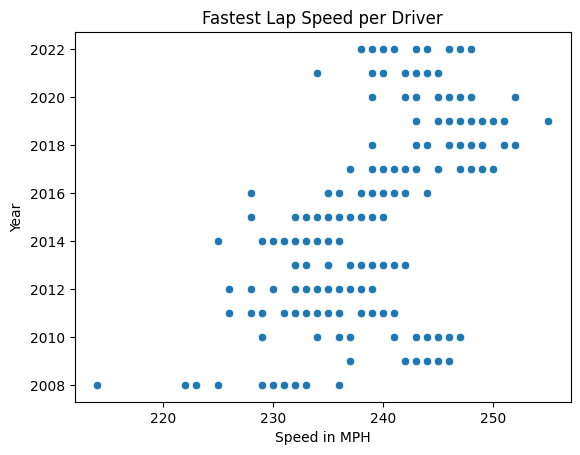

In [69]:
results = pd.read_csv('results.csv')
lap_times = pd.read_csv('lap_times.csv')

italian_circuit = races.loc[races['circuitId'] == 14]
italian_circuit = italian_circuit[italian_circuit.year >= 2008]
italian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)


italian_circuit =  pd.merge(italian_circuit, results, on='raceId')


italian_circuit = italian_circuit[italian_circuit.fastestLapSpeed != '\\N']


italian_circuit['fastestLapSpeed'] = italian_circuit['fastestLapSpeed'].astype(str).astype(float).astype(int)
italian_circuit['fastestLapTime'] = italian_circuit['fastestLapTime'].astype(str)
display(italian_circuit)


sns.scatterplot(x='fastestLapSpeed', y='year', data=italian_circuit)

def lap_time_to_seconds(lap_time_str):
    minutes, seconds = map(float, lap_time_str.split(':'))
    return minutes * 60 + seconds

# Apply the function to the 'lap_time' column
italian_circuit['seconds'] = italian_circuit['fastestLapTime'].apply(lap_time_to_seconds)
plt.title('Fastest Lap Speed per Driver')
plt.xlabel('Speed in MPH')
plt.ylabel('Year')

plt.show()


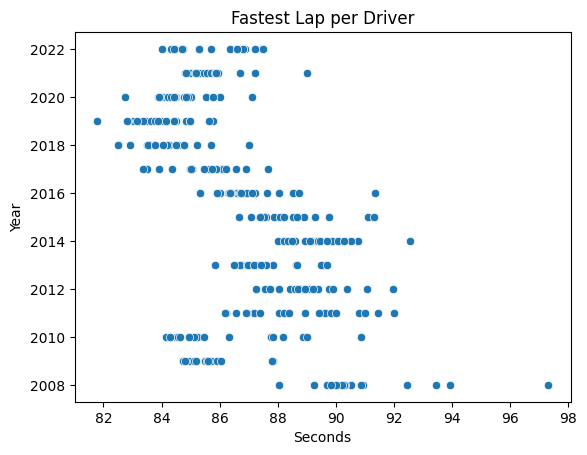

In [67]:
sns.scatterplot(x='seconds', y='year', data=italian_circuit)

plt.title('Fastest Lap per Driver')
plt.xlabel('Seconds')
plt.ylabel('Year')

plt.show()

In [70]:
australian_circuit = races.loc[races['circuitId'] == 1]
australian_circuit = australian_circuit[australian_circuit.year >= 2008]
australian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

lap_times = pd.read_csv('lap_times.csv')
qualifying = pd.read_csv('qualifying.csv')
results = pd.read_csv('results.csv')

results.drop([ 'statusId', 'points', 'laps',], axis=1,  inplace=True)


merger = ['raceId', 'driverId']
merger2 = ['raceId', 'driverId', 'constructorId']

australian_circuit =  pd.merge(australian_circuit, lap_times, on='raceId')


merged_australian_circuit = pd.merge(australian_circuit, qualifying, on=merger)
merged_australian_circuit.drop(['date', 'name', 'round',  'time_x'], axis=1,  inplace=True)


merged_australian_circuit = pd.merge(merged_australian_circuit, results, on= merger2)





In [71]:
bahrain_circuit = races.loc[races['circuitId'] == 3]
bahrain_circuit = bahrain_circuit[bahrain_circuit.year >= 2008]
bahrain_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)


merger = ['raceId', 'driverId']


bahrain_circuit =  pd.merge(bahrain_circuit, lap_times, on='raceId')

merged_bahrain_circuit = pd.merge(bahrain_circuit, qualifying, on=merger)


In [72]:
spanish_circuit = races.loc[races['circuitId'] == 4]
spanish_circuit = spanish_circuit[spanish_circuit.year >= 2008]
spanish_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

spanish_circuit =  pd.merge(spanish_circuit, lap_times, on='raceId')

merged_spanish_circuit = pd.merge(spanish_circuit, qualifying, on=merger)


In [73]:
monaco_circuit = races.loc[races['circuitId'] == 6]
monaco_circuit = monaco_circuit[monaco_circuit.year >= 2008]
monaco_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

monaco_circuit =  pd.merge(monaco_circuit, lap_times, on='raceId')

merged_monaco_circuit = pd.merge(monaco_circuit, qualifying, on=merger)



In [74]:
british_circuit = races.loc[races['circuitId'] == 9]
british_circuit = british_circuit[british_circuit.year >= 2008]
british_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

british_circuit =  pd.merge(british_circuit, lap_times, on='raceId')

merged_british_circuit = pd.merge(british_circuit, qualifying, on=merger)



In [75]:
hungarian_circuit = races.loc[races['circuitId'] == 11]
hungarian_circuit = hungarian_circuit[hungarian_circuit.year >= 2008]
hungarian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)


merger = ['raceId', 'driverId']

hungarian_circuit =  pd.merge(hungarian_circuit, lap_times, on='raceId')

merged_hungarian_circuit = pd.merge(hungarian_circuit, qualifying, on=merger)


In [76]:
belgian_circuit = races.loc[races['circuitId'] == 13]
belgian_circuit = belgian_circuit[belgian_circuit.year >= 2008]
belgian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

belgian_circuit =  pd.merge(belgian_circuit, lap_times, on='raceId')

merged_belgian_circuit = pd.merge(belgian_circuit, qualifying, on=merger)


In [77]:
italian_circuit = races.loc[races['circuitId'] == 14]
italian_circuit = italian_circuit[italian_circuit.year >= 2008]
italian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

italian_circuit =  pd.merge(italian_circuit, lap_times, on='raceId')

merged_italian_circuit = pd.merge(italian_circuit, qualifying, on=merger)

In [78]:
singapore_circuit = races.loc[races['circuitId'] == 15]
singapore_circuit = singapore_circuit[singapore_circuit.year >= 2008]
singapore_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

singapore_circuit =  pd.merge(singapore_circuit, lap_times, on='raceId')

merged_singapore_circuit = pd.merge(singapore_circuit, qualifying, on=merger)


In [79]:
sao_paulo_circuit = races.loc[races['circuitId'] == 18]
sao_paulo_circuit = sao_paulo_circuit[sao_paulo_circuit.year >= 2008]
sao_paulo_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

sao_paulo_circuit =  pd.merge(sao_paulo_circuit, lap_times, on='raceId')

merged_sao_paulo_circuit = pd.merge(sao_paulo_circuit, qualifying, on=merger)


In [80]:
japanese_circuit = races.loc[races['circuitId'] == 22]
japanese_circuit = japanese_circuit[japanese_circuit.year >= 2008]
japanese_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

japanese_circuit =  pd.merge(japanese_circuit, lap_times, on='raceId')

merged_japanese_circuit = pd.merge(japanese_circuit, qualifying, on=merger)


In [81]:
abu_dhabi_circuit = races.loc[races['circuitId'] == 24]
abu_dhabi_circuit = abu_dhabi_circuit[abu_dhabi_circuit.year >= 2008]
abu_dhabi_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

abu_dhabi_circuit =  pd.merge(abu_dhabi_circuit, lap_times, on='raceId')

merged_abu_dhabi_circuit = pd.merge(abu_dhabi_circuit, qualifying, on=merger)
